# 概率论实验

## 1. 导入概率论所需要的库

In [1]:
import numpy as np
import scipy as sp

## 2. 均值实现

In [2]:
ll = [[1, 2, 3, 4, 5, 6], [3, 4, 5, 6, 7, 8]]
np.mean(ll)  # 求全体元素的均值

4.5

In [3]:
# 按列求均值，0代表列向量
np.mean(ll, 0)

array([2., 3., 4., 5., 6., 7.])

In [4]:
# 按行求均值
np.mean(ll, 1)

array([3.5, 5.5])

## 3. 方差实现

In [5]:
b = [1, 3, 5, 6]
ll = [[1, 2, 3, 4, 5, 6], [3, 4, 5, 6, 7, 8]]

# 求方差
np.var(b)

3.6875

In [6]:
# 按行求方差
np.var(ll, 1)

array([2.91666667, 2.91666667])

## 4. 标准差实现

In [7]:
ll = [[1, 2, 3, 4, 5, 6], [3, 4, 5, 6, 7, 8]]

# 求标准差
np.std(ll)

1.9790570145063195

## 5. 协方差实现

In [8]:
b = [1, 3, 5, 6]

# 协方差
np.cov(b)

array(4.91666667)

## 6. 相关系数

In [9]:
vc=[1, 2, 39, 0, 8]
vb=[1, 2, 38, 0, 8]

# 相关系数
np.corrcoef(vc, vb)

array([[1.        , 0.99998623],
       [0.99998623, 1.        ]])

## 7. 二项分布实现

服从二项分布的随机变量 X 表示在 n 次独立同分布的伯努利试验中成功的次数，其中每次试验的成功概率为 p

### 7.1 导入所需要的库

In [10]:
from scipy.stats import binom, norm, beta, expon
import matplotlib.pyplot as plt

### 7.2 进行试验

假设总共成功 10 次，每次成功的概率为 0.3，总计采样 10000 次

In [11]:
binom_sim = binom.rvs(n = 10, p = 0.3, size = 10000)
print('Data: ', binom_sim)
print('Mean: ', np.mean(binom_sim))
print('Std: ', np.std(binom_sim))

Data:  [2 4 2 ... 3 1 3]
Mean:  2.9983
Std:  1.444817327553902


### 7.3 生成直方图

x 指定每个 bin(箱子)分布的数据，对应 x 轴， binx 是总共有几条条状图， density=True表示是频率直方图，反之为频数直方图，也就是每个条状图的占比例比，默认为 1

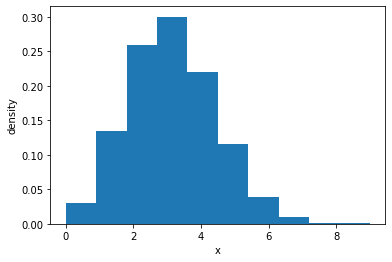

In [15]:
plt.hist(binom_sim, bins=10, density=True)
plt.xlabel(('x'))
plt.ylabel('density')
plt.show()

## 8. 泊松分布实现

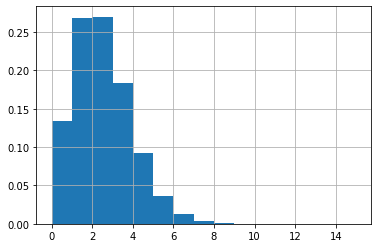

In [16]:
# 产生 10000 个符合 lambda=2 的泊松分布的数
X = np.random.poisson(lam=2, size=10000)

# 开始绘制
plt.hist(X, bins=15, density=True, range=[0, 15])
plt.grid()
plt.show()

## 9. 正太分布

正态分布是一种连续分布，其函数可以在实线上的任何地方取值。正态分布由两个参数描述：分布的平均值 $\mu$ 和标准差 $\sigma$ 

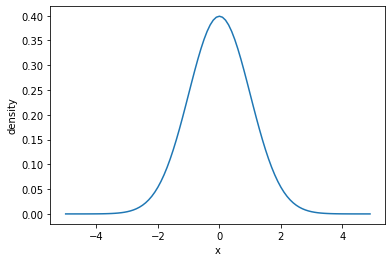

In [17]:
mu = 0  # 平均值
sigma = 1  # 标准差

# 分布采样点
x = np.arange(-5, 5, 0.1)

# 生成符合 平均值为0 标准差为1 的正太分布
y = norm.pdf(x, mu, sigma)

# 绘制图像
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("density")
plt.show()

## 10. 图像加噪声

比如在深度学习中，我们需要训练一个图像分类的模型，但是能拿到的图像不是很多，那有没有一种方法可以根据现有的图像生成一些新的图像出来呢？增加的图像需要满足一些条件：图像本身的内容不能发生根本性的改变，比如图像能看出来是一只狗的话扩增出来的图像应该也是一只狗而不能成为只剩下一个毛茸茸的尾巴。最直接的方式就是在原始的图像上增加一些噪声，也就是使得图像变得粗糙同时保持图像原本要表述的信息。我们下面来实现一下这个过程，该过程需要使用到 Python图像处理的模块 OpenCV，我们使用著名的 Lena 图作为原始图像。

## 10.1 导入需要的包

In [20]:
import cv2

### 10.2 原始图像

In [21]:
srcImage = cv2.imread(r"./img/lena.jpg")
print(srcImage.shape)

cv2.namedWindow("Original image")  # 图像显示窗口命名
cv2.imshow("Original image", srcImage)  # 显示图像
k = cv2.waitKey(0)

(311, 311, 3)


### 10.3 灰度处理原始图片

In [22]:
grayImage = cv2.cvtColor(srcImage, cv2.COLOR_BGR2GRAY)  # 灰度变换
print(grayImage.shape)
cv2.imshow("grayimage", grayImage)
k = cv2.waitKey(0)

(311, 311)


### 10.4 加入高斯噪声

In [24]:
image = np.array(grayImage/255, dtype=float)
percent = 0.01  # 图像加入噪声比例
num = int(percent*image.shape[0]*image.shape[1])

for i in range(num):
    temp1 = np.random.randint(image.shape[0])
    temp2 = np.random.randint(image.shape[1])
    
    mean = 0
    var = 0.04
    noise = np.random.normal(mean, var ** 0.5, 1)
    image[temp1][temp2] += noise
out = image

if out.min() < 0:
    low_clip = -1.
else:
    low_clip = 0.

out = np.clip(out, low_clip, 1)
gasuss_image = np.uint8(out * 255)
print(gasuss_image.shape)
cv2.imshow("gasuss image", gasuss_image)
k = cv2.waitKey(0)

(311, 311)


### 10.5 加入泊松噪声

In [25]:
image = np.array(grayImage, dtype=float)
percent = 0.001  # 图像加入噪声比例
num = int(percent*image.shape[0]*image.shape[1])

for i in range(num):
    temp1 = np.random.randint(image.shape[0])
    temp2 = np.random.randint(image.shape[1])
    
    scale = 150
    noise = np.random.poisson(scale, 1)
    image[temp1][temp2] += noise
    
out = image
if out.min() < 0:
    low_clip = -1.
else:
    low_clip = 0.

out = np.clip(out, low_clip, 255)
expon_image = np.uint8(out)
print(expon_image.shape)
cv2.imshow("expon image", expon_image)
k = cv2.waitKey(0)

(311, 311)
